<a href="https://colab.research.google.com/github/amberxuqianchen/nlp-workshop/blob/main/NLP_Workshop_2_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Overview

## Learning Objectives:

1. Gaining an intuitive technical understanding of bias in machine learning systems.

2. Exploring the interplay between data, algorithms, application, workflow, and human context when considering responsible AI.

## Audience
Everyone, really. No previous knowledge is assumed. If you have a background, you will be able to understand the topic more deeply.


## Legend
💎 Important

⚡ Be Aware - Debated issue / interpret carefully / simplicity over precision

🛠️ Setup/Technical (a.k.a "the code is not important, just run it!")

🧪 Methodological Issue

💻 Hands-On - Your turn! NO programming background

⌨️ ... A little programming background (in Python) is required

🦄 Out of Scope

## Advice for using Colab
1. Make a local copy to your Drive: otherwise changes you make (e.g. notes you take, code you write, etc) will not be saved
2. Do not edit the same colab directly as a group. Unlike Google Docs, one person’s version will overwrite another’s. If your browser happens to be open, it can overwrite anything that has been done by others since the last version in your browser!
3. Colab does not have version control! Use git for this if you want to collaborate (on a group project colab for example)


# An interactive example

SentimentIntensityAnalyzer (SIA) in the Natural Language Toolkit (NLTK) are a sentiment model based on a lexicon-based approach. It assigns a numerical score to the sentence indicating how positive, negative, or neutral it is.

If you want to check words in the VADAR lexicon: https://www.saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download necessary NLTK resources
nltk.download('vader_lexicon')

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

while True:
    # Get user input
    text = input("Enter a sentence or type 'q' to quit: ")
    # quit running
    if text == 'q':
        break

    # output
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0:
        print("Positive sentiment")
    elif sentiment['compound'] < 0:
        print("Negative sentiment")
    else:
        print("Neutral sentiment")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter a sentence or type 'q' to quit:  I am happy today
Positive sentiment
Enter a sentence or type 'q' to quit: I am sad
Negative sentiment
Enter a sentence or type 'q' to quit: q


Look closely...

- The neg, neu, and pos scores represent the proportion of negative, neutral, and positive words in the input text, respectively. 
- The compound score is a normalized, weighted score that ranges from -1 (most negative) to 1 (most positive). It is calculated by summing the valence scores of each word in the input text and normalizing the result by the total number of words.

In [ ]:
# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]
for sentence in sentences:
    vs = sia.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

💎 Ask chatGPT:

Can you please provide a step-by-step guide for performing sentiment analysis using the VADER lexicon and NLTK library in Google Collab?

# True stuff

## 🛠️ Set up

In [ ]:
# Install Required Libraries for the first time if local environment; Colab: run it everytime
!pip install pandas numpy matplotlib seaborn nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#  Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import re
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 🛠️ Obtain the data
There are several ways to obtain data for sentiment analysis, including scraping data from social media platforms, using APIs to retrieve data, or downloading datasets from public sources. For this tutorial, we will be using a public dataset available on Kaggle, which contains movie reviews along with their corresponding sentiment labels (positive or negative).

To obtain dataset manually, follow these steps:

1. Go to the following link: https://www.kaggle.com/c/word2vec-nlp-tutorial/data or any kaggle/huggingface datasets
2. Click on the "download" button to download the "labeledTrainData.tsv" file.
3. Save the file to your preferred location on your computer.
4. Load the data into a pandas dataframe using the following code:

Another way to get the dataset:
- ! is a Jupyter Notebook cell magic command that allows you to run shell commands directly from a code cell.
- wget is a shell command to download the linked file
- unzip is a shell command to unzip the file
- This downloads and unzips a dataset of labelled sentences for sentiment analysis from the UCI Machine Learning Repository. 

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
!unzip "sentiment labelled sentences.zip"

--2023-03-08 19:35:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled  100%[===================>]  82.21K  --.-KB/s    in 0.1s    

2023-03-08 19:35:51 (591 KB/s) - ‘sentiment labelled sentences.zip’ saved [84188/84188]

Archive:  sentiment labelled sentences.zip
   creating: sentiment labelled sentences/
  inflating: sentiment labelled sentences/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/sentiment labelled sentences/
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelle

## 🧪 Read the dataset

In [ ]:
df = pd.read_csv('psych_news.csv')
df

,Title,Date,URL,text
0,Mentorship Program Access Grads Launched At UC...,Jan \n 25 \n 2023,https://psych.ucsb.edu/news-events/news/2023/m...,"Access Grads, a program pioneered by graduate ..."
1,Prof. Emily Jacobs to lead new Ann S. Bowers W...,Jan \n 17 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,"Associate Professor Emily Jacobs, whose labora..."
2,Professor Heejung Kim Receives Outstanding Con...,Jan \n 10 \n 2023,https://psych.ucsb.edu/news-events/news/2023/p...,PBS Professor Heejung Kim has received the 202...
3,PBS Statement on UAW Strike,Nov \n 18 \n 2022,https://psych.ucsb.edu/news-events/news/2022/p...,The PBS faculty acknowledge the pressures on o...
4,Emeritus Professor Gerald Jacobs receives Life...,Nov \n 2 \n 2022,https://psych.ucsb.edu/news-events/news/2022/e...,Jerry Jacobs has received the 2022 Richard C. ...
5,PBS Faculty Emily Jacobs Named Top 10 Scientis...,Oct \n 17 \n 2022,https://psych.ucsb.edu/news-events/news/2022/p...,Associate Professor Emily Jacobs was named a T...
6,PBS Professor Michael Beyeler Receives $1.5 Mi...,Oct \n 4 \n 2022,https://psych.ucsb.edu/news-events/news/2022/p...,"Good vision is essential for everyday life, bu..."
7,PBS Chair and graduate student Elizabeth Quinn...,Sep \n 28 \n 2022,https://psych.ucsb.edu/news-events/news/2022/p...,"Professor Shelly Gable, the PBS chair, togethe..."
8,PBS Faculty Richard Mayer: The most productive...,Sep \n 16 \n 2022,https://psych.ucsb.edu/news-events/news/2022/p...,Distinguished UCSB Professor in Psychological ...
9,PBS Graduate Student Wins Graduate Research Award,Aug \n 24 \n 2022,https://psych.ucsb.edu/news-events/news/2022/p...,"Elizabeth Quinn-Jensen, a third year Ph.D. stu..."


In [ ]:
df = pd.read_csv('/content/sentiment labelled sentences/imdb_labelled.txt', sep='\t',header = None)
df.columns = ['text', 'label']
df

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


### Data manipulation using pandas

In [ ]:
# Filtering Data: include rows with a positive label
positive_df = df.loc[df['label'] == 1]
positive_df

,text,label
4,The best scene in the movie was when Gerardo i...,1
7,Saw the movie today and thought it was a good ...,1
9,Loved the casting of Jimmy Buffet as the scien...,1
10,And those baby owls were adorable.,1
11,The movie showed a lot of Florida at it's best...,1
...,...,...
737,":) Anyway, the plot flowed smoothly and the ma...",1
738,"The opening sequence of this gem is a classic,...",1
739,Fans of the genre will be in heaven.,1
740,Lange had become a great actress.,1


In [ ]:
# Counting Values
label_counts = df['label'].value_counts()
label_counts

1    386
0    362
Name: label, dtype: int64

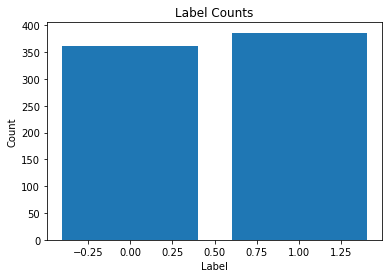

In [ ]:
plt.bar(label_counts.index, label_counts.values)
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## 💎 Text Preprocessing

Before we start with sentiment analysis, we need to clean and preprocess the text data. This involves removing unnecessary characters, converting text to lowercase, removing stopwords, and tokenizing the text.

In [ ]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)


In [ ]:
text = str(text).lower()
text = re.sub(r'\d+', '', text)
text = re.sub(r'[^\w\s]', '', text)
word_tokens = word_tokenize(text)
filtered_text = [word for word in word_tokens if word not in stop_words]
    

In [ ]:
text = 'I am happy'
word_tokens = word_tokenize(text)
filtered_text = [word for word in word_tokens if word not in stop_words]
filtered_text

['I', 'happy']

## 💎 Sentiment Analysis

Now, we are ready to perform sentiment analysis on the preprocessed text data. We will be using the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon provided by the NLTK library.

In [ ]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']


## ⚡ Visualize Results

Finally, we can visualize the results 
- check word cloud using wordcloud library;
- check sentiment analysis using various visualization techniques provided by the Matplotlib and Seaborn libraries.

### Word Cloud

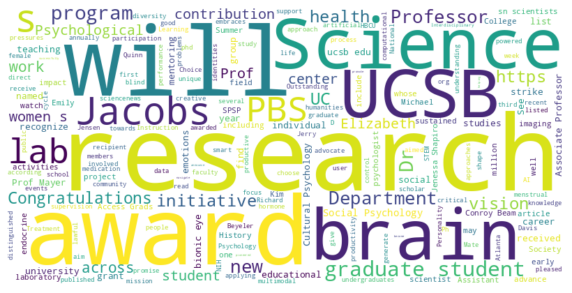

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text data into a single string
text = " ".join(content for content in df.text)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color="white").generate(text)

# # Display the generated image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


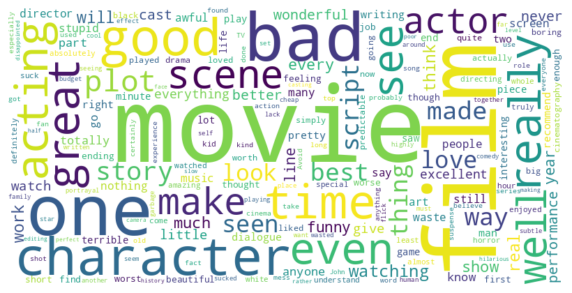

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text data into a single string
text = " ".join(content for content in df.text)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color="white").generate(text)

# # Display the generated image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
?WordCloud

### sentiment scores

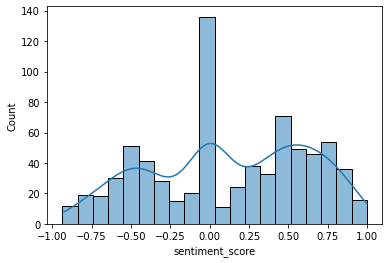

In [ ]:
df['sentiment_score'] = df['text'].apply(lambda x: get_sentiment_score(clean_text(x)))
sns.histplot(data=df, x='sentiment_score', bins=20, kde=True)
plt.show()


In [ ]:
df

,text,label,sentiment_score
0,"A very, very, very slow-moving, aimless movie ...",0,-0.4215
1,Not sure who was more lost - the flat characte...,0,0.0000
2,Attempting artiness with black & white and cle...,0,-0.6908
3,Very little music or anything to speak of.,0,0.0000
4,The best scene in the movie was when Gerardo i...,1,0.6369
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,-0.2732
744,"Unfortunately, any virtue in this film's produ...",0,-0.6369
745,"In a word, it is embarrassing.",0,-0.3818
746,Exceptionally bad!,0,-0.5849


In [ ]:
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)
df

,text,label,sentiment_score,sentiment_label
0,"A very, very, very slow-moving, aimless movie ...",0,-0.4215,0
1,Not sure who was more lost - the flat characte...,0,0.0000,0
2,Attempting artiness with black & white and cle...,0,-0.6908,0
3,Very little music or anything to speak of.,0,0.0000,0
4,The best scene in the movie was when Gerardo i...,1,0.6369,1
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,-0.2732,0
744,"Unfortunately, any virtue in this film's produ...",0,-0.6369,0
745,"In a word, it is embarrassing.",0,-0.3818,0
746,Exceptionally bad!,0,-0.5849,0


## ⚡ Evaluate the VADER results against the existing label (for labelled dataset)

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(df['label'], df['sentiment_label']))


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       362
           1       0.79      0.77      0.78       386

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



Precision, recall, and F1-score are metrics used to evaluate the performance of a classification model.

- Precision is the ratio of true positive predictions to all positive predictions made by the model. It measures how many of the positive predictions made by the model were actually correct.

- Recall is the ratio of true positive predictions to all actual positive cases. It measures how many of the actual positive cases were correctly identified by the model.

- F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance.

- Support is the number of actual occurrences of the class in the test data. It can be used to evaluate the model's ability to predict less frequent classes.

In [ ]:
# or as a psychologist, we do it in a psychology way
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(df['label'], df['sentiment_label'])

# Print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)


t-statistic:  0.6206652035630345
p-value:  0.5350092436829554


# Next step:
inter-rater 